<a href="https://colab.research.google.com/github/Haigutus/energy_open_data/blob/main/open_data_elering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# URL for API query
API link: https://dashboard.elering.ee/swagger-ui.html


In [2]:
import requests

prices_query_url = "https://dashboard.elering.ee/api/nps/price"

response = requests.get(prices_query_url)

In [6]:
response.json()["data"]["ee"]

[{'price': 1.7, 'timestamp': 1606078800},
 {'price': 1.22, 'timestamp': 1606082400},
 {'price': 1.29, 'timestamp': 1606086000},
 {'price': 1.02, 'timestamp': 1606089600},
 {'price': 0.89, 'timestamp': 1606093200},
 {'price': 0.94, 'timestamp': 1606096800},
 {'price': 1.49, 'timestamp': 1606100400},
 {'price': 3.64, 'timestamp': 1606104000},
 {'price': 54.02, 'timestamp': 1606107600},
 {'price': 56.12, 'timestamp': 1606111200},
 {'price': 54.47, 'timestamp': 1606114800},
 {'price': 50.07, 'timestamp': 1606118400},
 {'price': 44.82, 'timestamp': 1606122000},
 {'price': 40.09, 'timestamp': 1606125600},
 {'price': 40.03, 'timestamp': 1606129200},
 {'price': 50.32, 'timestamp': 1606132800},
 {'price': 50.23, 'timestamp': 1606136400},
 {'price': 51.69, 'timestamp': 1606140000},
 {'price': 60.85, 'timestamp': 1606143600},
 {'price': 61.21, 'timestamp': 1606147200},
 {'price': 55.86, 'timestamp': 1606150800},
 {'price': 38.02, 'timestamp': 1606154400},
 {'price': 5.84, 'timestamp': 1606158000}

In [17]:
import pandas
import pytz

data = pandas.DataFrame(response.json()["data"]["ee"])
data["iso_utc_timestamp"] = pandas.to_datetime(data['timestamp'],unit='s', utc=True)
data["iso_timestamp"] = data["iso_utc_timestamp"].dt.tz_convert(pytz.timezone("Europe/Tallinn"))



data

,timestamp,price,iso_utc_timestamp,iso_timestamp
0,1606078800,1.70,2020-11-22 21:00:00+00:00,2020-11-22 23:00:00+02:00
1,1606082400,1.22,2020-11-22 22:00:00+00:00,2020-11-23 00:00:00+02:00
2,1606086000,1.29,2020-11-22 23:00:00+00:00,2020-11-23 01:00:00+02:00
3,1606089600,1.02,2020-11-23 00:00:00+00:00,2020-11-23 02:00:00+02:00
4,1606093200,0.89,2020-11-23 01:00:00+00:00,2020-11-23 03:00:00+02:00
5,1606096800,0.94,2020-11-23 02:00:00+00:00,2020-11-23 04:00:00+02:00
6,1606100400,1.49,2020-11-23 03:00:00+00:00,2020-11-23 05:00:00+02:00
7,1606104000,3.64,2020-11-23 04:00:00+00:00,2020-11-23 06:00:00+02:00
8,1606107600,54.02,2020-11-23 05:00:00+00:00,2020-11-23 07:00:00+02:00
9,1606111200,56.12,2020-11-23 06:00:00+00:00,2020-11-23 08:00:00+02:00


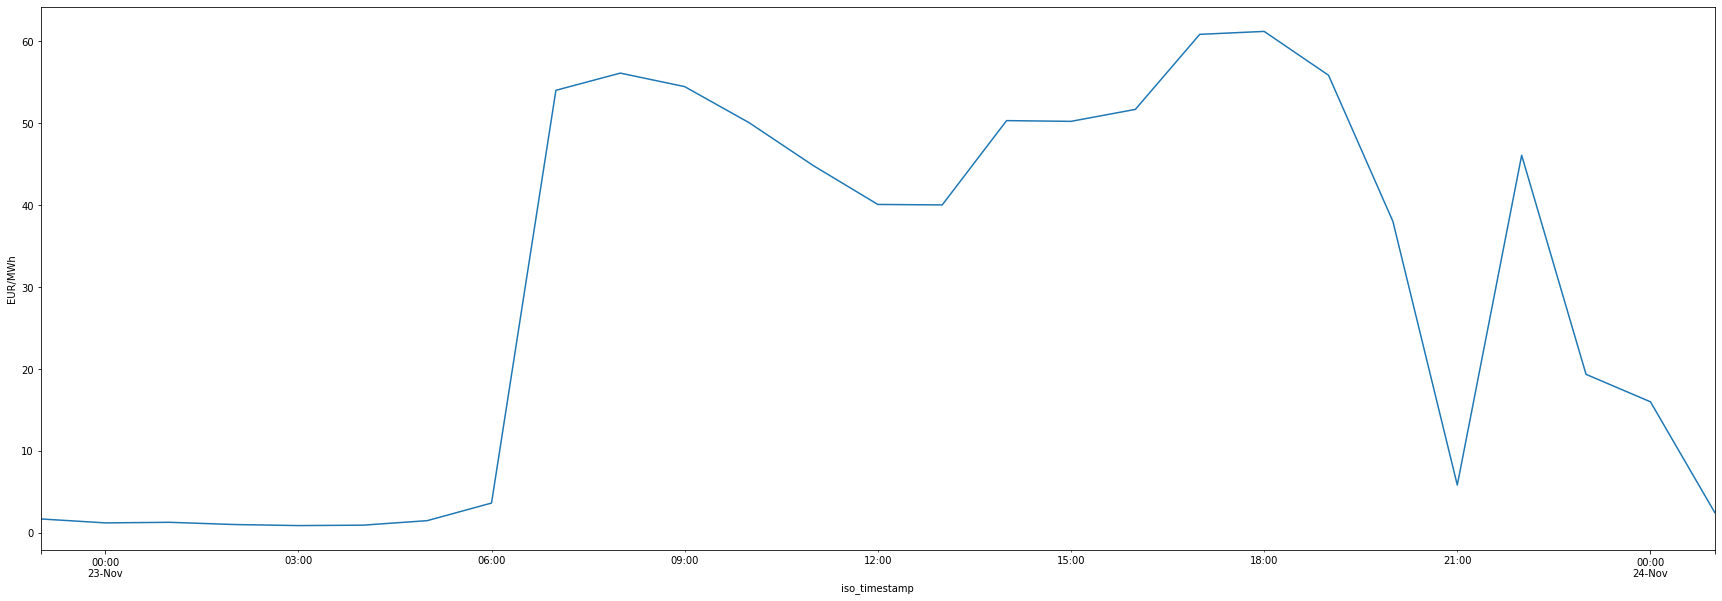

In [24]:
data.set_index("iso_timestamp")["price"].plot(figsize=(30, 10), ylabel="EUR/MWh")